In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('cardio_train.csv',sep=';')

In [4]:
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [5]:
df['cardio'].value_counts()

cardio
0    35021
1    34979
Name: count, dtype: int64

<Axes: xlabel='cardio'>

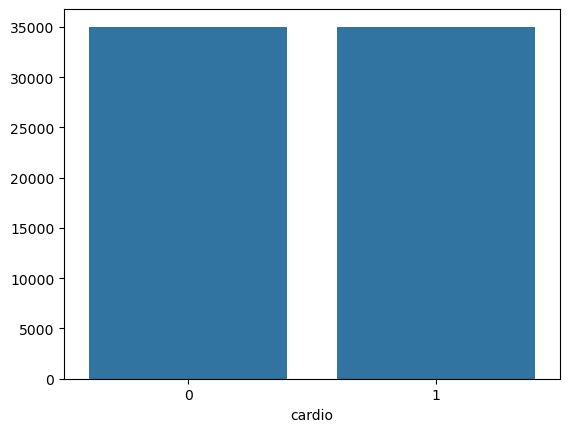

In [6]:
cardio_counts = df['cardio'].value_counts()
sns.barplot(x=cardio_counts.index, y=cardio_counts.values)

In [7]:
df.isnull().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

<Axes: xlabel='gender', ylabel='count'>

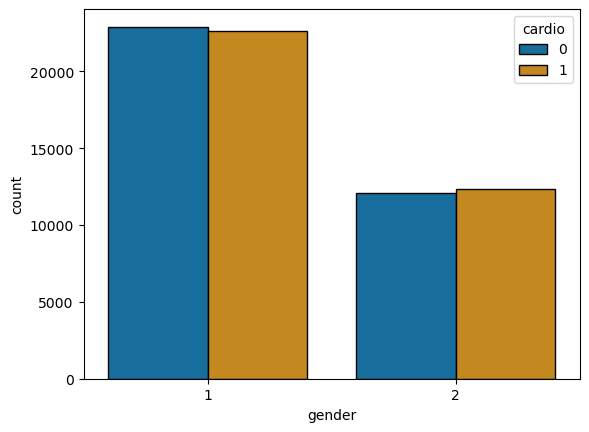

In [8]:
sns.countplot(x='gender',hue='cardio',data=df,palette='colorblind',edgecolor='black')

In [9]:
df['yr'] = (df['age']/365).round(0)

In [10]:
df['yr']

0        50.0
1        55.0
2        52.0
3        48.0
4        48.0
         ... 
69995    53.0
69996    62.0
69997    52.0
69998    61.0
69999    56.0
Name: yr, Length: 70000, dtype: float64

<Axes: xlabel='yr', ylabel='count'>

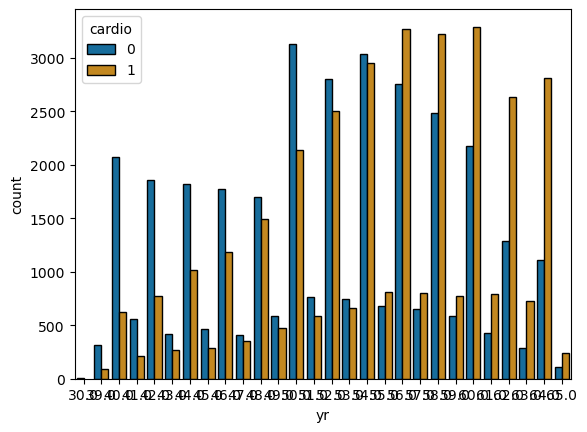

In [11]:
sns.countplot(x='yr',hue='cardio',data=df,palette='colorblind',edgecolor='black')

# Train Test Split 

In [12]:
df.corr()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,yr
id,1.000000,0.003457,0.003502,-0.003038,-0.001830,0.003356,-0.002529,0.006106,0.002467,-0.003699,0.001210,0.003755,0.003799,0.003050
age,0.003457,1.000000,-0.022811,-0.081515,0.053684,0.020764,0.017647,0.154424,0.098703,-0.047633,-0.029723,-0.009927,0.238159,0.999090
gender,0.003502,-0.022811,1.000000,0.499033,0.155406,0.006005,0.015254,-0.035821,-0.020491,0.338135,0.170966,0.005866,0.008109,-0.023017
height,-0.003038,-0.081515,0.499033,1.000000,0.290968,0.005488,0.006150,-0.050226,-0.018595,0.187989,0.094419,-0.006570,-0.010821,-0.081456
weight,-0.001830,0.053684,0.155406,0.290968,1.000000,0.030702,0.043710,0.141768,0.106857,0.067780,0.067113,-0.016867,0.181660,0.053661
ap_hi,0.003356,0.020764,0.006005,0.005488,0.030702,1.000000,0.016086,0.023778,0.011841,-0.000922,0.001408,-0.000033,0.054475,0.020793
ap_lo,-0.002529,0.017647,0.015254,0.006150,0.043710,0.016086,1.000000,0.024019,0.010806,0.005186,0.010601,0.004780,0.065719,0.017754
cholesterol,0.006106,0.154424,-0.035821,-0.050226,0.141768,0.023778,0.024019,1.000000,0.451578,0.010354,0.035760,0.009911,0.221147,0.154386
gluc,0.002467,0.098703,-0.020491,-0.018595,0.106857,0.011841,0.010806,0.451578,1.000000,-0.004756,0.011246,-0.006770,0.089307,0.098596
smoke,-0.003699,-0.047633,0.338135,0.187989,0.067780,-0.000922,0.005186,0.010354,-0.004756,1.000000,0.340094,0.025858,-0.015486,-0.047884


In [13]:
df = df.drop(['yr'],axis=1)

In [14]:
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [15]:
x = df.iloc[:,:-1]

In [16]:
x

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
0,0,18393,2,168,62.0,110,80,1,1,0,0,1
1,1,20228,1,156,85.0,140,90,3,1,0,0,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0
3,3,17623,2,169,82.0,150,100,1,1,0,0,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0


In [17]:
y = df.iloc[:,12]

In [18]:
y

0        0
1        1
2        1
3        1
4        0
        ..
69995    0
69996    1
69997    1
69998    1
69999    0
Name: cardio, Length: 70000, dtype: int64

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=.30,random_state=1)

In [21]:
xtrain

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
23561,33670,16136,2,169,71.0,100,80,1,1,1,0,1
34858,49789,14615,1,158,69.0,140,80,2,1,0,0,1
54953,78398,20507,1,164,65.0,120,80,1,1,0,0,1
59230,84572,16720,1,153,53.0,100,60,1,1,0,0,1
1730,2449,21050,1,159,71.0,140,90,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
49100,70099,21289,2,175,78.0,120,80,1,1,0,0,1
20609,29410,19116,1,164,68.0,120,80,1,1,0,0,0
21440,30634,18049,2,178,82.0,120,80,1,1,0,0,1
50057,71447,21957,1,169,77.0,120,80,1,1,0,0,0


# using Random Forest

In [22]:
from sklearn.ensemble import RandomForestClassifier

In [23]:
rclf = RandomForestClassifier()

In [24]:
rclf.fit(xtrain,ytrain)

RandomForestClassifier()

In [25]:
rclf.score(xtest,ytest)

0.7276666666666667

# using Decision Tree

In [26]:
from sklearn.tree import DecisionTreeClassifier

In [27]:
clf = DecisionTreeClassifier()

In [28]:
clf.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [29]:
clf.score(xtest,ytest)

0.635

In [30]:
from sklearn.feature_selection import SelectKBest

In [31]:
from sklearn.feature_selection import f_classif

In [32]:
FIT_FEATURE = SelectKBest (score_func=f_classif) 

In [33]:
FIT_FEATURE.fit(x,y)

SelectKBest()

In [37]:
score_column = pd.DataFrame(FIT_FEATURE.scores_, columns=['score value'])

In [38]:
score_column

,score value
0,1.010461
1,4209.007957
2,4.603641
3,8.197397
4,2388.777887
5,208.339524
6,303.629011
7,3599.361137
8,562.772977
9,16.790541


In [41]:
Name_col = pd.DataFrame(x.columns)

In [42]:
top_features = pd.concat([Name_col,score_column],axis=1)

In [43]:
top_features

,0,score value
0,id,1.010461
1,age,4209.007957
2,gender,4.603641
3,height,8.197397
4,weight,2388.777887
5,ap_hi,208.339524
6,ap_lo,303.629011
7,cholesterol,3599.361137
8,gluc,562.772977
9,smoke,16.790541


In [44]:
top_features.nlargest(8,'score value')

,0,score value
1,age,4209.007957
7,cholesterol,3599.361137
4,weight,2388.777887
8,gluc,562.772977
6,ap_lo,303.629011
5,ap_hi,208.339524
11,active,89.091494
9,smoke,16.790541


# Feature importance

In [47]:
from sklearn.ensemble import ExtraTreesClassifier

In [48]:
model = ExtraTreesClassifier()

In [49]:
model.fit(x,y)

ExtraTreesClassifier()

In [50]:
model.feature_importances_

array([0.15954395, 0.20543734, 0.0061794 , 0.1365395 , 0.14771927,
       0.16976817, 0.10396188, 0.04529487, 0.01131501, 0.00453157,
       0.00430735, 0.00540168])

In [54]:
top = pd.Series(model.feature_importances_, index= x.columns)

In [55]:
top

id             0.159544
age            0.205437
gender         0.006179
height         0.136540
weight         0.147719
ap_hi          0.169768
ap_lo          0.103962
cholesterol    0.045295
gluc           0.011315
smoke          0.004532
alco           0.004307
active         0.005402
dtype: float64

<Axes: >

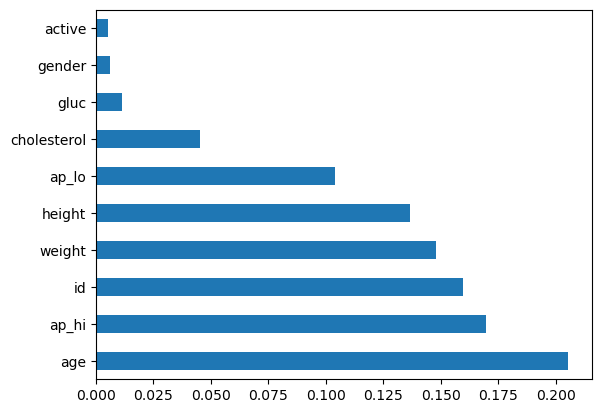

In [61]:
top.nlargest(10).plot(kind='barh')